In [1]:
import os
import glob
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())


Torch version: 2.9.1+cu128
CUDA available: False


In [2]:

IMAGE_DIR = "../data/test_images/"


OUTPUT_DIR = "../outputs/yolo_v8/"
os.makedirs(OUTPUT_DIR, exist_ok=True)


CONF_THRESHOLD = 0.25
MASK_THRESHOLD = 0.5


In [3]:
image_paths = sorted(
    glob.glob(IMAGE_DIR + "*.jpg") +
    glob.glob(IMAGE_DIR + "*.jpeg") +
    glob.glob(IMAGE_DIR + "*.png")
)

print(f"Total images found: {len(image_paths)}")

assert len(image_paths) > 0, "No images found in data/test_images"


Total images found: 23


In [4]:
model = YOLO("yolov8s-seg.pt")



0: 640x576 1 person, 186.2ms
Speed: 2.1ms preprocess, 186.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 576)
hardik1.jpeg: 1 person(s) detected

0: 384x640 1 person, 1 orange, 126.0ms
Speed: 0.9ms preprocess, 126.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
hardik1h.jpeg: 1 person(s) detected

0: 640x608 1 person, 194.8ms
Speed: 1.6ms preprocess, 194.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 608)
hardik2.jpeg: 1 person(s) detected

0: 448x640 1 person, 1 chair, 143.6ms
Speed: 1.2ms preprocess, 143.6ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
hardik2h.jpeg: 1 person(s) detected

0: 640x640 2 persons, 203.1ms
Speed: 1.7ms preprocess, 203.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
hardik3.jpeg: 2 person(s) detected

0: 384x640 1 person, 142.6ms
Speed: 2.2ms preprocess, 142.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
hardik3h.jpeg: 1 person(s) detected

/tmp/ipykernel_50404/2422444659.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(4, 6))


0: 640x544 1 person, 179.8ms
Speed: 1.8ms preprocess, 179.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 544)
virat2h.jpeg: 1 person(s) detected

0: 384x640 5 persons, 122.3ms
Speed: 0.9ms preprocess, 122.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
virat3.jpeg: 5 person(s) detected

0: 384x640 1 person, 116.3ms
Speed: 1.1ms preprocess, 116.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
virat3h.jpeg: 1 person(s) detected


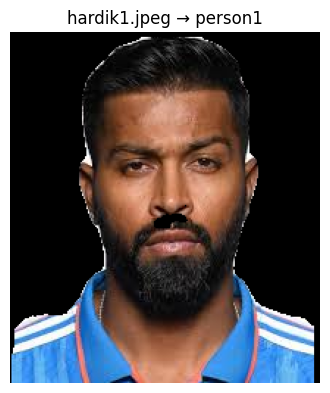

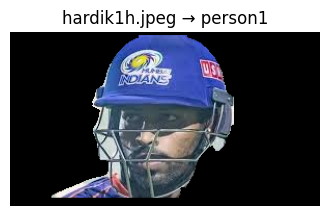

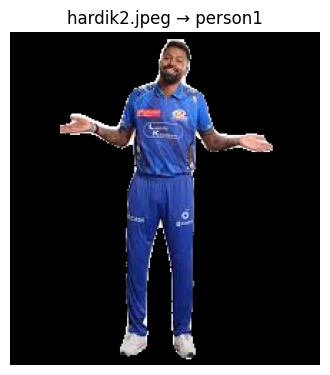

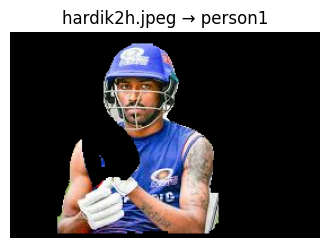

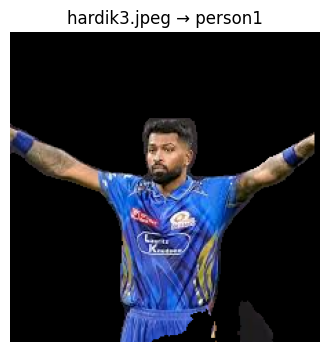

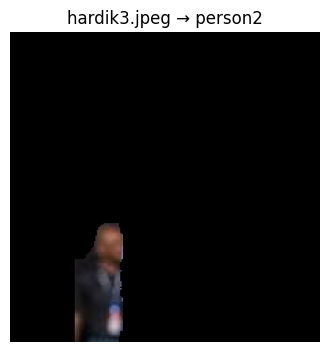

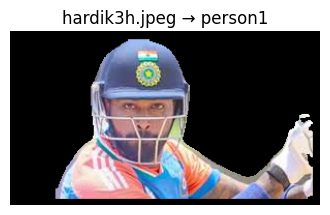

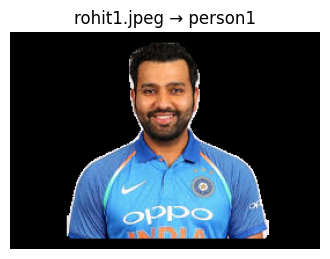

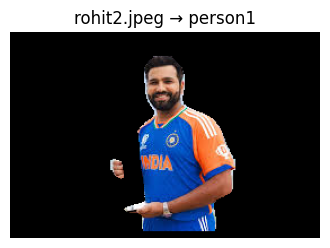

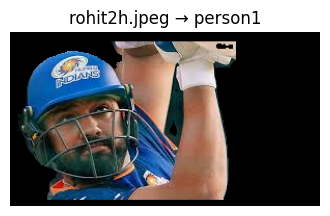

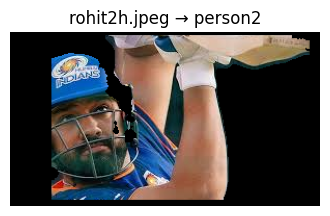

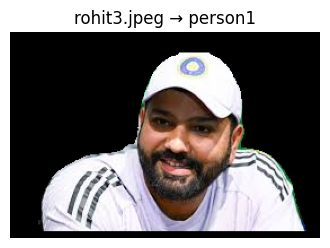

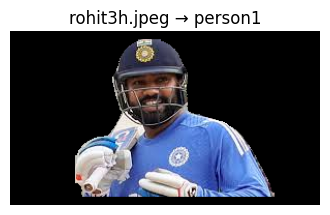

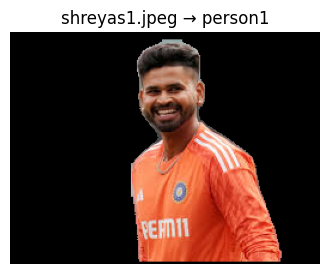

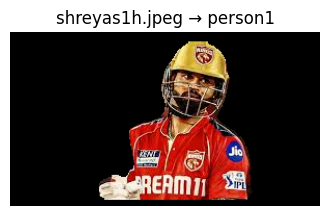

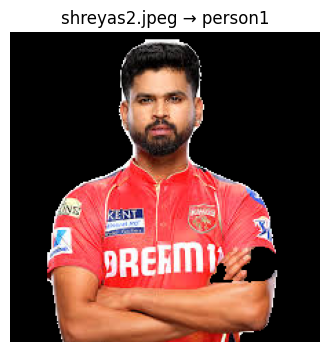

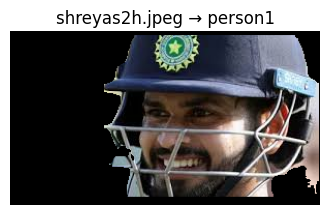

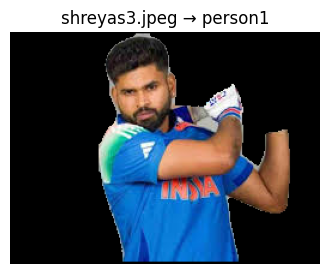

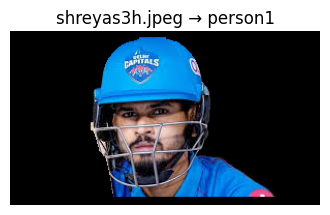

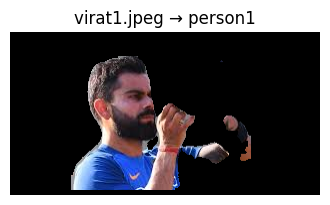

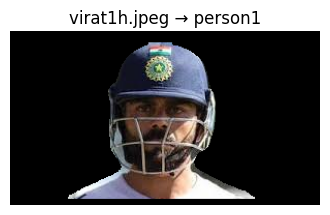

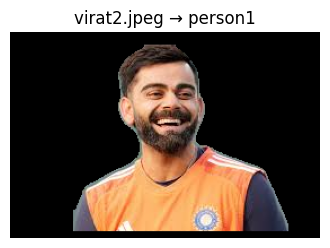

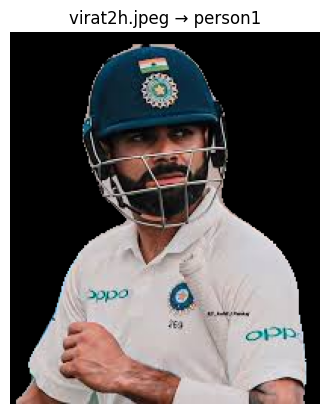

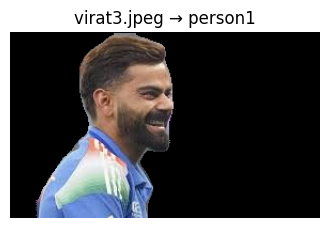

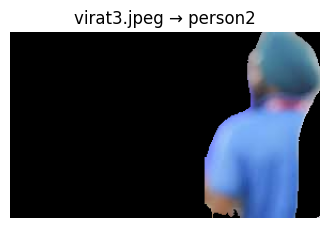

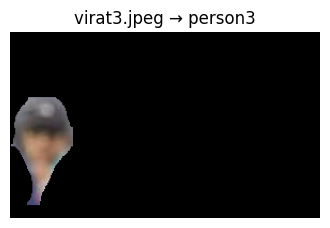

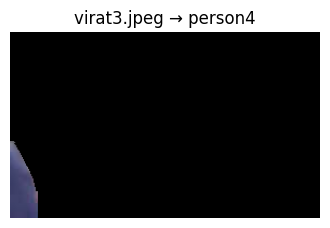

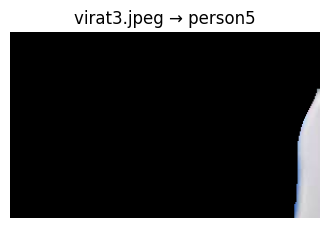

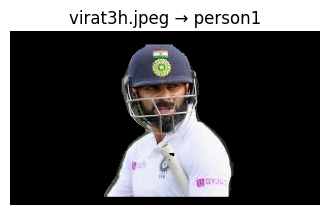

In [5]:
for img_path in image_paths:
    img = cv2.imread(img_path)
    img_name = os.path.basename(img_path)

    if img is None:
        continue

    results = model(img, conf=CONF_THRESHOLD)

    person_id = 0

    for r in results:
        if r.masks is None:
            continue

        masks = r.masks.data.cpu().numpy()
        classes = r.boxes.cls.cpu().numpy()
        boxes = r.boxes.xyxy.cpu().numpy()

        for i, cls_id in enumerate(classes):
            if int(cls_id) == 0:  
                person_id += 1 

                mask = masks[i]
                mask = cv2.resize(mask, (img.shape[1], img.shape[0]))

                segmented = img.copy()
                segmented[mask < MASK_THRESHOLD] = 0

                save_name = img_name.replace(
                    ".", f"_person{person_id}."
                )
                save_path = os.path.join(OUTPUT_DIR, save_name)
                cv2.imwrite(save_path, segmented)

                # show image
                plt.figure(figsize=(4, 6))
                plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
                plt.title(f"{img_name} → person{person_id}")
                plt.axis("off")

    print(f"{img_name}: {person_id} person(s) detected")


